## Proposal_Group7

## Introduction

### Background

Income inequality is an ongoing issue of great public concern in every country and in the United States it  has a history substantially older than the country itself (NPR,2016). Racial and ethnic communities in the United States are experiencing significant changes in rising income inequality (Kochhar.R & Cilluffo.A, 2018). There are notable wage gaps among American workers by race (Williams.W,2021). Based on these materials, this report aims to explore the correlation between salary and race which is one factor of income inequality. 

### Guiding Question

>Is there a *difference in means* of salaries (in USD) between people of `African American` descent and people of `White` descent in the USA? 

### Dataset

NEED AN INTRO FOR DATASET:https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

## Prelimary Results

### Reading the Data

Datasets are unable to be read directly from Kaggle. So, the dataset is downloaded to the repository and read from there.

In [30]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(gridExtra)
library(scales) #Run this first!

In [35]:
salary_dataset <- read.csv("https://raw.githubusercontent.com/hongkailiu123/stat201_Group7/main/Salary_Data_Based_country_and_race.csv")

In [34]:
head(salary_dataset)

,X,Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
2,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
3,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
4,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
5,4,52,Male,Master's,Director,20,200000,USA,Asian
6,5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic


The initial glance at the dataset reveals the inclusion of several types of `Race`. To obtain a more convincing statistical inference result, it is advisable to select the two race types with the *highest* number of observations. Additionally, given that `Country` significantly affects people's `Salary` (for instance, an Asian worker in the USA may earn more than an Asian worker in China for an identical job), it makes sense to focus solely on data collected from one country (with *most observations!). Let's proceed with data cleaning and wrangling to prepare the data for analysis!"

### Cleaning and Wrangling the Data


Let's see the numbers of observations from different `Country` and numbers of observations for each type of `Race` (tibbles in decreasing orders).

In [97]:
country_counts <- salary_dataset|>
                    filter(!is.na(Salary))|>
                    group_by(Country)|>
                    summarize(n=n())|>
                    arrange(-n)

country_counts

Country,n
<chr>,<int>
USA,1359
China,1343
Australia,1336
UK,1336
Canada,1325


The summary tibble (country_counts) suggests us to work with the observations from *USA*. 

In [98]:
salary_race_USA <- salary_dataset|>
                filter(Country == "USA" & !is.na(Salary))|>  #only keep observations from USA
                select(Salary, Race)

race_counts <- salary_race_USA|>
                group_by(Race)|>
                summarize(n=n())|>
                arrange(-n)

race_counts

Race,n
<chr>,<int>
African American,354
White,347
Asian,336
Hispanic,322


All samples of different race are large enough for us to work with! In the following analysis, we will foucs on the largest two samples, *African American* and *White*, salaries data from *USA*. 

Since we are only investigating the salaries of USA people with *African American* or *White* descent, Let's sample the data to our needs.

In [99]:
white_sample <- salary_race_USA|>
                filter(Race == "White")

african_american_sample <- salary_race_USA|>
                filter(Race == "African American")

### Plots

#### Salary Sample Distributions

We will begin by visualizing the salary sample distribution of African American and White Races

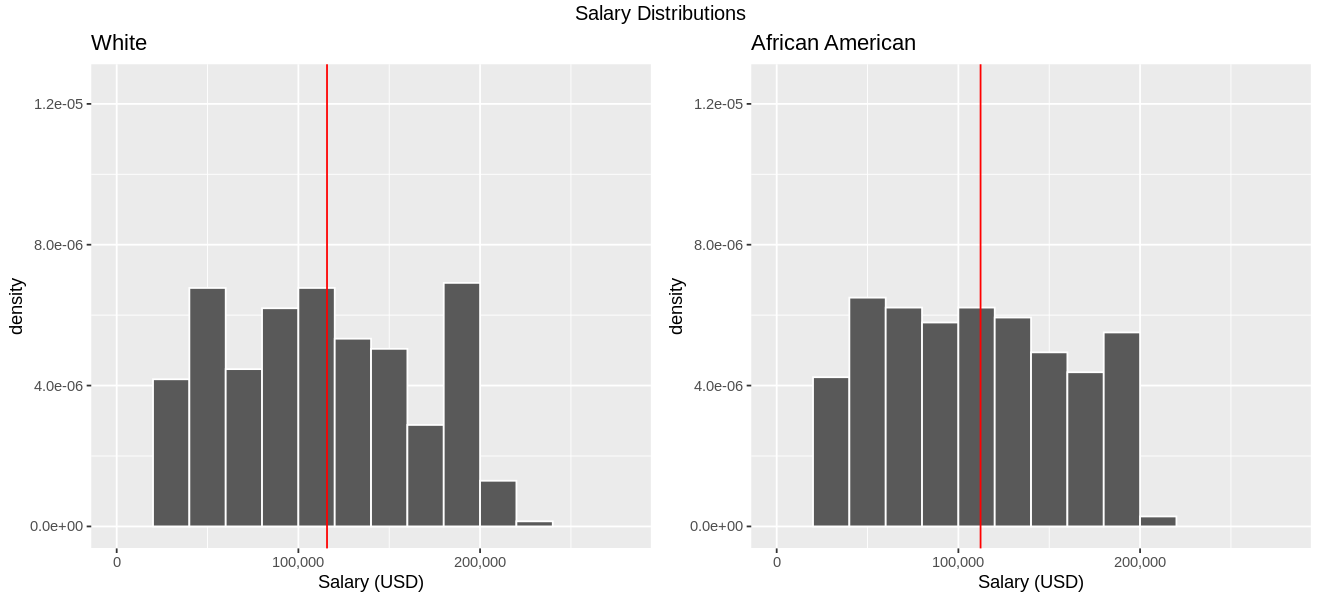

In [102]:
options(repr.plot.width = 11, repr.plot.height = 5) # setting dimensions

white_dist <- salary_race_USA %>% 
    filter(Race == "White") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(white_sample$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "White") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis


african_american_dist <- salary_race_USA %>% 
    filter(Race == "African American") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(african_american_sample$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "African American") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis

grid.arrange(white_dist, african_american_dist, ncol = 2, top = "Salary Distributions")

These are sample distributions for how African American and White people are paid in salary. As we can see, both the Asian and White distributions are roughly symmetric about its means. Let's look at the more direct difference in numbers.

### Estimates

In [107]:
race_sal_estimates <- salary_race_USA %>%
                        filter(Race == "African American" | Race == "White" )|>
                        group_by(Race) %>%
                        summarize(n = n(),
                                  mean_salary = mean(Salary),
                                  sd_salary = sd(Salary))

race_sal_estimates

Race,n,mean_salary,sd_salary
<chr>,<int>,<dbl>,<dbl>
African American,354,112209.7,50610.19
White,347,115763.8,53376.88


In this tibble, we have the columns n, mean_salary, and sd_salary. The **n** colum represents the number of observations we have per race in our sample. The **Mean Salary** column represents the Mean Salary in USD for each race and the **SD Salary** column represents the spread in the salary distribution.

From the point estimates, we can see there is difference in means of salaries around 3500 USD. The mean salary for White workers is higher than African American workers in USA. 

## Methods: Plan

## References

Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians\
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/ \
NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade\
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade \
Williams.W,2021. Wage gaps by race.\
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31 
